In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:

# Load the dataset
file_path = '/content/drive/MyDrive/reviews_by_course.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head(10))


     CourseId                                             Review  Label
0  2-speed-it                                             BOring      1
1  2-speed-it                                            Bravo !      5
2  2-speed-it                                           Very goo      5
3  2-speed-it  Great course - I recommend it for all, especia...      5
4  2-speed-it    One of the most useful course on IT Management!      5
5  2-speed-it  I was disappointed because the name is mislead...      3
6  2-speed-it    Super content. I'll definitely re-do the course      5
7  2-speed-it  Etant contrôleur de gestion pour le départemen...      5
8  2-speed-it  One of the excellent courses at Coursera for i...      5
9  2-speed-it  Is there any reason why you should not apply t...      5


In [ ]:
df.shape

(140320, 3)

In [ ]:
label_counts = df['Label'].value_counts()
print(f'Number of reviews in each value:\n{label_counts}')
df.shape

Number of reviews in each value:
Label
5    106516
4     22460
3      5923
1      2867
2      2554
Name: count, dtype: int64


(140320, 3)

DATA PREPROCESSING

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Display the cleaned data
print(df.head())


CourseId    0
Review      3
Label       0
dtype: int64
     CourseId                                             Review  Label
0  2-speed-it                                             BOring      1
1  2-speed-it                                            Bravo !      5
2  2-speed-it                                           Very goo      5
3  2-speed-it  Great course - I recommend it for all, especia...      5
4  2-speed-it    One of the most useful course on IT Management!      5


In [ ]:
# 1->negative, 2->neutral 3->positive
df = df.dropna(subset=['Review'])

# Define the remap_labels function
def remap_labels(label):
    if label == 1 or label == 2:
        return 1
    elif label == 3:
        return 2
    elif label == 4 or label == 5:
        return 3
    else:
        return label


df['Label'] = df['Label'].apply(remap_labels)


print(df.head())


     CourseId                                             Review  Label
0  2-speed-it                                             BOring      1
1  2-speed-it                                            Bravo !      3
2  2-speed-it                                           Very goo      3
3  2-speed-it  Great course - I recommend it for all, especia...      3
4  2-speed-it    One of the most useful course on IT Management!      3


In [ ]:
label_counts = df['Label'].value_counts()
print(f'Number of reviews in each value:\n{label_counts}')
df.shape

Number of reviews in each value:
Label
3    128974
2      5923
1      5420
Name: count, dtype: int64


(140317, 3)

ANALYSIS USING GRAPHS AND WORD CLOUDS

Number of reviews in each value:
Label
3    128974
2      5923
1      5420
Name: count, dtype: int64


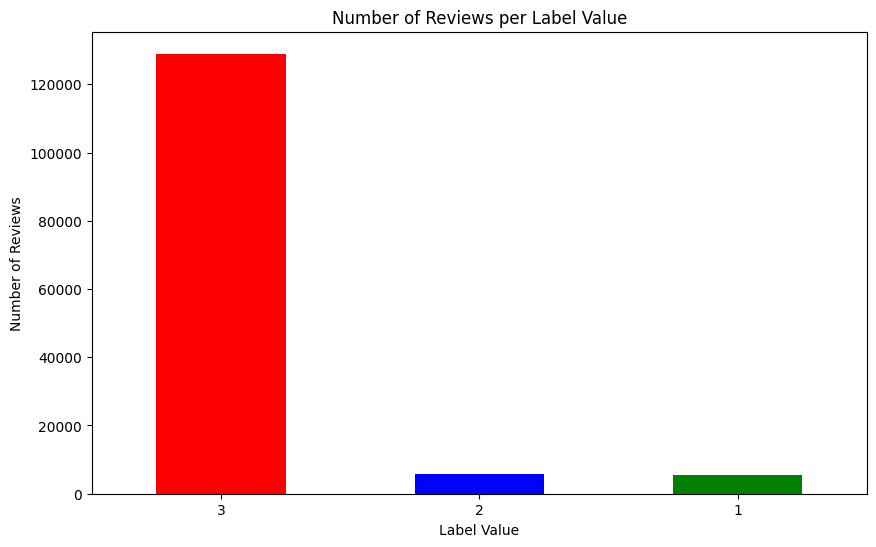

In [ ]:
#bar graph
label_counts = df['Label'].value_counts()
print(f'Number of reviews in each value:\n{label_counts}')

# Plotting the number of reviews in each value
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=['red', 'blue', 'green'])

plt.xlabel('Label Value')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Label Value')
plt.xticks(rotation=0)
plt.show()

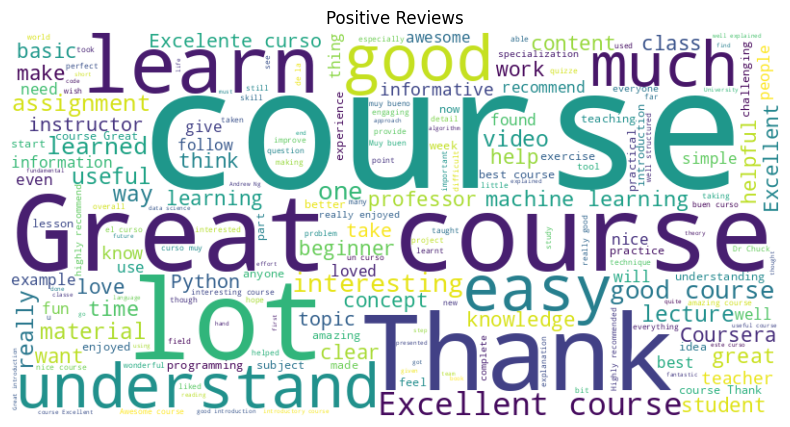

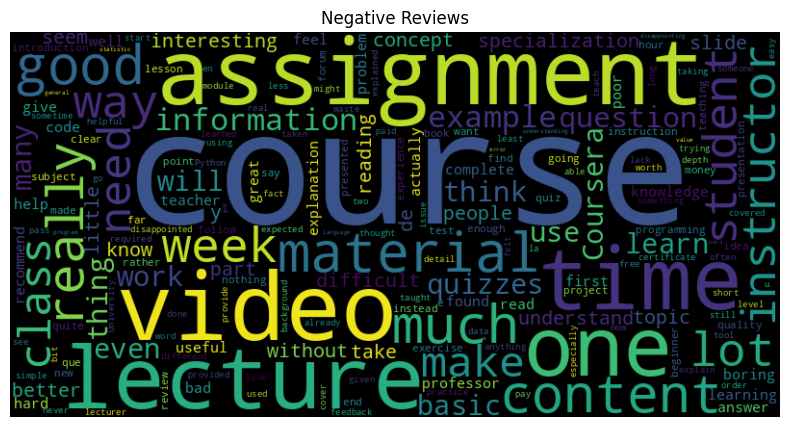

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_reviews = " ".join(review for review in df[df['Label'] == 3]['Review'])
negative_reviews = " ".join(review for review in df[df['Label'] == 1]['Review'])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')
plt.show()


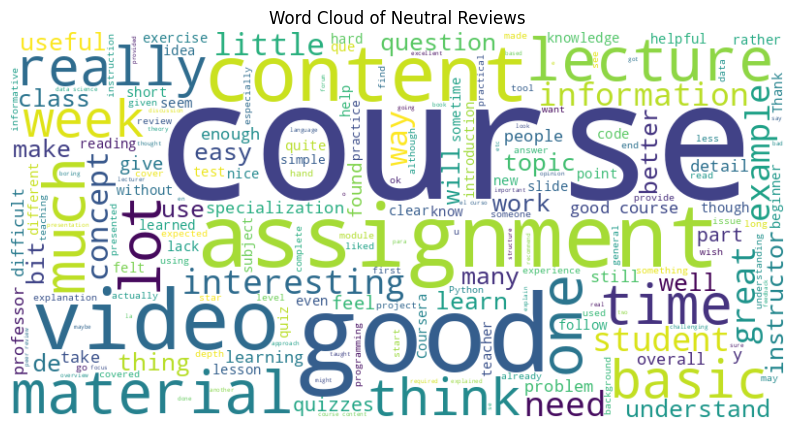

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'Review' and 'Label' columns

# Filter neutral reviews
neutral_reviews = df[df['Label'] == 2]['Review'].values

# Combine neutral reviews into a single string
neutral_text = ' '.join(neutral_reviews)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral Reviews')
plt.show()


STEMMING

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

#stemming


stemmed=PorterStemmer()
def stemming(content):
  stemmedCont=re.sub('[^a-zA-Z]',' ',content)
  stemmedCont=stemmedCont.lower()
  stemmedCont=stemmedCont.split()
  stemmedCont=[stemmed.stem(word) for word in stemmedCont if not word in stopwords.words('english')]
  stemmedCont=' '.join(stemmedCont)
  return stemmedCont


df['Review']=df['Review'].apply(stemming)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head(5)

,CourseId,Review,Label
0,2-speed-it,bore,1
1,2-speed-it,bravo,3
2,2-speed-it,goo,3
3,2-speed-it,great cours recommend especi busi manag,3
4,2-speed-it,one use cours manag,3


In [ ]:
#seperating reviews and labels
X=df['Review'].values
Y=df['Label'].values

Feature extraction


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to extract VADER sentiment scores
def get_vader_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Using the compound score as a single feature

# Apply VADER to training and test sets
X_train_series = pd.Series(X_train)
X_test_series = pd.Series(X_test)

X_train_vader = X_train_series.apply(get_vader_scores)
X_test_vader = X_test_series.apply(get_vader_scores)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer() # gives a numeric statistic how important a word is based on its frequency
X_train_tfidf = vec.fit_transform(X_train)
X_test_tfidf = vec.transform(X_test)

In [ ]:
# Combine TF-IDF features with VADER scores
import scipy.sparse as sp
X_train_combined = sp.hstack((X_train_tfidf, X_train_vader.values[:, None]))
X_test_combined = sp.hstack((X_test_tfidf, X_test_vader.values[:, None]))

ML ALGORITHM

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier( random_state=2)


rf_classifier.fit(X_train_combined, Y_train)


train_accuracy = rf_classifier.score(X_train_combined, Y_train)
test_accuracy = rf_classifier.score(X_test_combined, Y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.99
Test Accuracy: 0.92


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test data
y_pred = rf_classifier.predict(X_test_combined)

# Classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)



Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.14      0.23      1084
           2       0.36      0.01      0.02      1185
           3       0.93      1.00      0.96     25795

    accuracy                           0.92     28064
   macro avg       0.67      0.38      0.40     28064
weighted avg       0.89      0.92      0.89     28064

Confusion Matrix:
[[  147    12   925]
 [   31    15  1139]
 [   24    15 25756]]


EMOTION ANALYSIS

In [ ]:
!pip install nrclex
!python -m textblob.download_corpora
from nrclex import NRCLex
from textblob import TextBlob
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nrclex import NRCLex

nltk.download('punkt')
nltk.download('wordnet')

def get_emotions(text):
    emotions = NRCLex(text)
    return emotions.top_emotions

df['Emotions'] = df['Review'].apply(get_emotions)
print(df[['Review', 'Emotions']].head())


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                    Review  \
0                                     bore   
1                                    bravo   
2                                      goo   
3  great cours recommend especi busi manag   
4                      one use cours manag   

                                            Emotions  
0                                  [(negative, 1.0)]  
1  [(fear, 0.0), (anger, 0.0), (anticip, 0.0), (t...  
2                  [(negative, 0.5), (disgust, 0.5)]  
3                    [(trust, 0.5), (positive, 0.5)]  
4  [(fear, 0.0), (anger, 0.0), (anticip, 0.0), (t...  


<ipython-input-107-2c7b2952c84c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emotion', y='Count', data=emotion_df, palette='viridis')


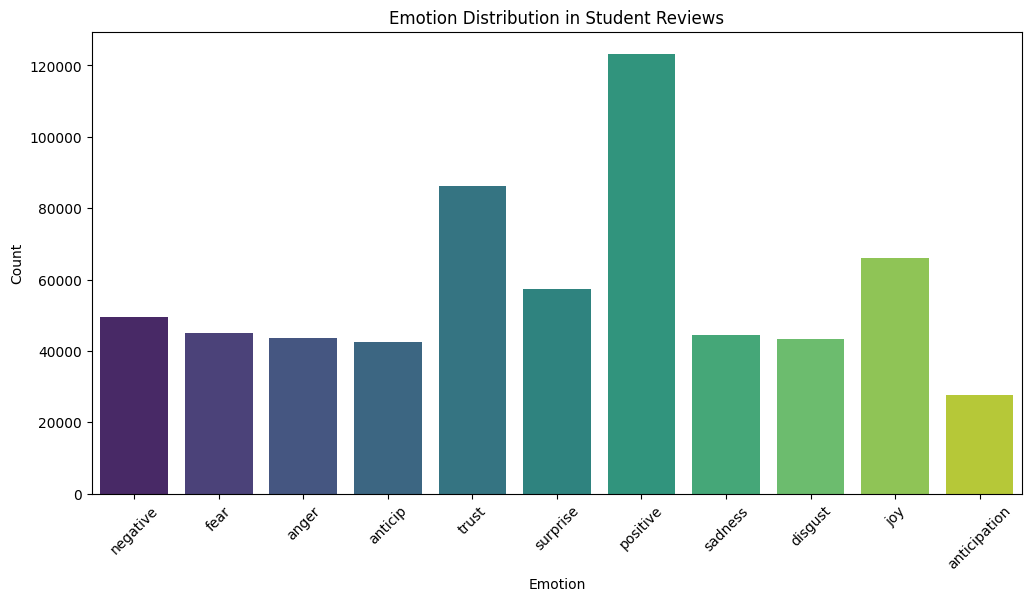

In [ ]:
from collections import Counter

# Aggregate emotion scores for all reviews
emotion_counts = Counter()

for emotion_list in df['Emotions']:
    for emotion, score in emotion_list:
        emotion_counts[emotion] += 1

# Convert to DataFrame for plotting
emotion_df = pd.DataFrame.from_dict(emotion_counts, orient='index', columns=['Count'])
emotion_df = emotion_df.reset_index().rename(columns={'index': 'Emotion'})
plt.figure(figsize=(12, 6))
sns.barplot(x='Emotion', y='Count', data=emotion_df, palette='viridis')
plt.title('Emotion Distribution in Student Reviews')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from collections import Counter


subset_df = df.head(100)  # Take the first 100 rows of your DataFrame

all_emotions = subset_df['Emotions'].sum()
overall_emotion_counts = Counter(all_emotions)


emotion_df = pd.DataFrame(overall_emotion_counts.items(), columns=['Emotion', 'Count'])

# Print the aggregated emotion profile for the subset
print("Overall Emotion Profile for the First 100 Rows:")
print(emotion_df.to_string(index=False))



Overall Emotion Profile for the First 100 Rows:
                           Emotion  Count
                   (negative, 1.0)      1
                       (fear, 0.0)     53
                      (anger, 0.0)     53
                    (anticip, 0.0)     53
                      (trust, 0.0)     53
                   (surprise, 0.0)     53
                   (positive, 0.0)     53
                   (negative, 0.0)     53
                    (sadness, 0.0)     53
                    (disgust, 0.0)     53
                        (joy, 0.0)     53
                   (negative, 0.5)      1
                    (disgust, 0.5)      1
                      (trust, 0.5)      6
                   (positive, 0.5)      6
                     (trust, 0.25)      2
       (trust, 0.3333333333333333)      3
    (positive, 0.3333333333333333)      2
         (joy, 0.3333333333333333)      1
                  (positive, 0.25)      3
              (anticipation, 0.25)      2
      (trust, 0.428571428571

In [ ]:
# Assuming X_test_vader contains the Vader sentiment scores for test set
overall_sentiment_score = np.mean(X_test_vader)
print(f"Overall Sentiment Score: {overall_sentiment_score:.2f}")


Overall Sentiment Score: 0.43


MODEL

In [ ]:
def analyze_text_sentiment_emotion(text, model, tfidf_vectorizer):
    # Preprocess the input text
    processed_text = stemming(text)

    # Vectorize the processed text using TF-IDF
    text_tfidf = tfidf_vectorizer.transform([processed_text])

    # Get VADER sentiment score
    analyzer = SentimentIntensityAnalyzer()
    vader_score = analyzer.polarity_scores(processed_text)['compound']

    # Combine TF-IDF features with VADER score
    combined_features = sp.hstack((text_tfidf, np.array([vader_score])))

    # Predict sentiment using the model
    sentiment_prediction = model.predict(combined_features)[0]

    # Get emotion using NRCLex
    emotions = NRCLex(processed_text).top_emotions

    return sentiment_prediction, vader_score, emotions

In [ ]:
user_input = input("Enter the text to analyze: ")
sentiment_pred, vader_score, emotions = analyze_text_sentiment_emotion(user_input,rf_classifier,vec)

# Print results
print("\nSentiment Prediction:", sentiment_pred)
if(sentiment_pred==1):
  print("NEGATIVE")
elif(sentiment_pred==2):
  print("NEUTRAL")
elif (sentiment_pred==3):
  print("POSITIVE")
print("VADER Sentiment Score:", vader_score)
print("Top Emotions:", emotions)

Enter the text to analyze: @

Sentiment Prediction: 3
POSITIVE
VADER Sentiment Score: 0.0
Top Emotions: [('fear', 0.0), ('anger', 0.0), ('anticip', 0.0), ('trust', 0.0), ('surprise', 0.0), ('positive', 0.0), ('negative', 0.0), ('sadness', 0.0), ('disgust', 0.0), ('joy', 0.0)]
